In [15]:
# import library termasuk spacy, gensim, re
import numpy as np
import pandas as pd
import spacy
import string
import gensim
import operator
import re

In [16]:
from google.colab import files

uploaded = files.upload()

Saving Lampid_2009.txt to Lampid_2009 (1).txt


In [17]:
df_text = pd.read_csv('Lampid_2009.txt', sep='\t')  # Jika pemisahnya adalah tab


In [18]:
#kita intip
df_text.head()

,PIDATO KENEGARAAN
0,PRESIDEN REPUBLIK INDONESIA
1,DALAM RANGKA
2,PERINGATAN HARI ULANG TAHUN KE 64 KEMER...
3,REPUBLIK INDONESIA DI DEPAN RAPAT PAR...
4,DEWAN PERWAKILAN RAKYAT REPUBLIK INDON...


In [20]:
#Kita preprocessing datanya:
# Membuang stop_words
#Membuang punctuation
#Membuang tanda2
#Membuang kata yang mengandung angka

#Tokenisasi: Memecah2 kata
#Lematisasi: Dibuat kata dasar
from spacy.lang.en.stop_words import STOP_WORDS

spacy_nlp = spacy.load('en_core_web_sm')

#create list of punctuations and stopwords
punctuations = string.punctuation
stop_words = spacy.lang.en.stop_words.STOP_WORDS

#function for data cleaning and processing
#This can be further enhanced by adding / removing reg-exps as desired.

def spacy_tokenizer(sentence):

    #remove distracting single quotes
    sentence = re.sub('\'','',sentence)

    #remove digits adnd words containing digits
    sentence = re.sub('\w*\d\w*','',sentence)

    #replace extra spaces with single space
    sentence = re.sub(' +',' ',sentence)

    #remove unwanted lines starting from special charcters
    sentence = re.sub(r'\n: \'\'.*','',sentence)
    sentence = re.sub(r'\n!.*','',sentence)
    sentence = re.sub(r'^:\'\'.*','',sentence)

    #remove non-breaking new line characters
    sentence = re.sub(r'\n',' ',sentence)

    #remove punctunations
    sentence = re.sub(r'[^\w\s]',' ',sentence)

    #creating token object
    tokens = spacy_nlp(sentence)

    #lower, strip and lemmatize
    tokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in tokens]

    #remove stopwords, and exclude words less than 2 characters
    tokens = [word for word in tokens if word not in stop_words and word not in punctuations and len(word) > 2]

    #return tokens
    return tokens

In [23]:
# Buat DataFrame dengan teks pada kolom 'wiki_plot'
df_text = pd.DataFrame({'text_plot': ["presiden republik indonesia dalam rangka peringatan hari ulang tahun ke 64 kemerdekaan republik indonesia di depan rapat paripurna dewan perwakilan rakyat republik indonesia "]} )

# Pembersihan, tokenisasi, dan lemmatisasi teks, dan menyimpan hasilnya di kolom baru
print('Pembersihan, Tokenisasi, dan Lemmatisasi...')
df_text['text_plot_tokenized'] = df_text['text_plot'].map(lambda x: spacy_tokenizer(x))

# Menampilkan DataFrame dengan kolom baru
df_text.head()

Pembersihan, Tokenisasi, dan Lemmatisasi...


,text_plot,text_plot_tokenized
0,presiden republik indonesia dalam rangka perin...,"[presiden, republik, indonesia, dalam, rangka,..."


In [24]:
#kita intip hasil tokenisasinya
text_plot = df_text['text_plot_tokenized']
text_plot[0:5]

0    [presiden, republik, indonesia, dalam, rangka,...
Name: text_plot_tokenized, dtype: object

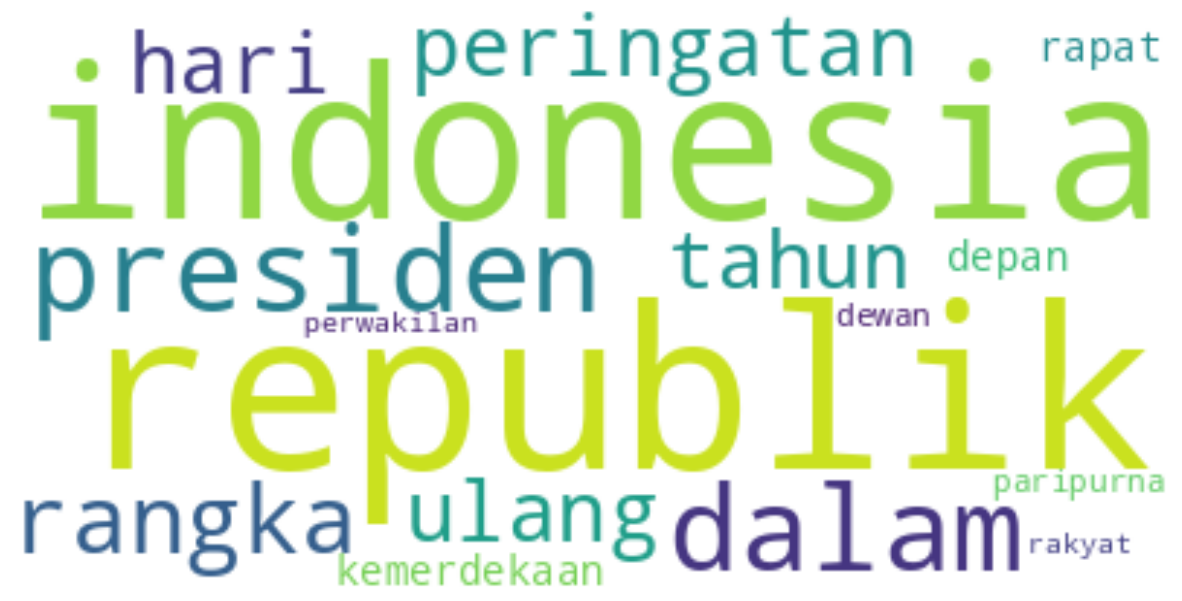

In [25]:
# Membuat wordcloud untuk memunculkan kata-kata yang paling sering muncul
#Makin sering muncul satu kata, makin besar hurufnya
from wordcloud import WordCloud
import matplotlib.pyplot as plt

series = pd.Series(np.concatenate(text_plot)).value_counts()[:100]
wordcloud = WordCloud(background_color='white').generate_from_frequencies(series)

plt.figure(figsize=(15,15), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()